<h1>MILAN_AIRBNB DATASET EDA</h1>

<h6>Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset MILAN_AIRBNB donde se recogen datos de las viviendas en alquiler de la ciudad Milán a través de la plataforma AIRBNB

El ejercicio consiste en plotear gráficas interesantes buscando patrones relevantes que pudieran ser útiles en la predicción de alquileres de viviendas con fines vacacionales</h6>



In [1]:
#LINEA DE IMPORTACION DE LIBRERIAS

In [24]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Exploración básica del dataset</h2>

Estas son las variables por entrada que contiene este dataset:

<ul>
    <li><b>id =</b>Identificación de la vivienda </li>
    <li><b>name =</b>Nombre de la vivienda y descripción </li>
     <li><b>host_id =</b>id del anfitrión </li>
      <li><b>host_name =</b>Nombre del anfitrión </li>
    <li><b>neighbourhood =</b>Nombre del barrio </li>
    <li><b>Latitude =</b>Cordenada de latitud de la vivienda </li>
     <li><b>Longitude =</b>Cordenada de longitud de la vivienda </li>
     <li><b>Room_type =</b>Tipo de vivienda </li>
     <li><b>Price =</b>Precio por noche de la vivienda </li>
     <li><b>minimum_nights =</b>Estadía mínima de la vivienda  </li>
    <li><b>number_of_reviews=</b>Número de reseñas  </li>
     <li><b>last_of_reviews=</b>Fecha de última reseña </li>
    <li><b>reviews_per_month=</b> Reseñas por mes</li>
    <li><b>calculated_host_listings_count=</b>Número de hospedados</li>
    <li><b>availability_365=</b> Días disponibles al año</li>
</ul>

 



In [25]:
# Ruta del archivo csv. Almacenar nombre de ruta en una variable
path_data="milan_airbnb.csv"
#Importar DataSet y comprobar que esta correcto
df = pd.read_csv(path_data, index_col= "id")
df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
6400,The Studio Milan,13822,Francesca,TIBALDI,45.44119,9.17813,Private room,100,4,12,19/04/10,0.14,1,358
23986,""" Characteristic Milanese flat""",95941,Jeremy,NAVIGLI,45.44806,9.17373,Entire home/apt,150,1,15,07/09/20,0.21,1,363
28300,nice flat near the park,121663,Marta,SARPI,45.47647,9.17359,Private room,180,1,8,22/04/12,0.11,1,365
32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,VIALE MONZA,45.52014,9.22300,Entire home/apt,75,2,15,01/07/18,0.23,3,200
32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,VIALE MONZA,45.51874,9.22495,Entire home/apt,71,2,29,23/10/16,0.71,3,308


In [4]:
#Información del DataSet 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18322 entries, 6400 to 50955051
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            18312 non-null  object 
 1   host_id                         18322 non-null  int64  
 2   host_name                       18198 non-null  object 
 3   neighbourhood                   18322 non-null  object 
 4   latitude                        18322 non-null  float64
 5   longitude                       18322 non-null  float64
 6   room_type                       18322 non-null  object 
 7   price                           18322 non-null  int64  
 8   minimum_nights                  18322 non-null  int64  
 9   number_of_reviews               18322 non-null  int64  
 10  last_review                     13260 non-null  object 
 11  reviews_per_month               13260 non-null  float64
 12  calculated_host_listings_c

<h5>Faltan datos en nombre de vivienda y nombre anfitrión, no siendo relevantes para el estudio, pero donde más datos faltan es en las columnas de last_review y reviews_per_month, aunque a priori no los consideramos que vayan a influir en el modelo </h5>

In [5]:
# Verificacion de datos faltantes
df.isnull().sum(axis = 0)

name                                10
host_id                              0
host_name                          124
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5062
reviews_per_month                 5062
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<h5>Faltan 10 datos en name, 124 en host_name, y , lo mas importante, faltan 5062 en las columnas last_reviews y reviews_per_month</h5>

In [6]:
# Análisis estadístico básico
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.832200e+04,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,13260.000000,18322.000000,18322.000000
mean,8.494918e+07,45.471318,9.187382,115.094913,5.798112,23.720827,0.799344,14.421897,153.508624
std,1.040579e+08,0.020731,0.029543,290.793019,26.687720,57.657486,1.220346,46.295635,138.757302
min,1.944000e+03,45.395050,9.060680,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.243642e+07,45.454462,9.168782,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,3.141304e+07,45.470875,9.186291,73.500000,2.000000,3.000000,0.310000,1.000000,123.000000
75%,1.335227e+08,45.486850,9.209680,110.000000,3.000000,19.000000,0.990000,4.000000,302.000000
max,4.117208e+08,45.539850,9.275280,11999.000000,1124.000000,896.000000,13.710000,314.000000,365.000000


Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios


In [7]:
#Prescindimos de estas 5 columnas, por no considerarlas variables que puedan tener algún impacto en nuestra salida
df.drop(["host_id","name","host_name","latitude","longitude"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18322 entries, 6400 to 50955051
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   18322 non-null  object 
 1   room_type                       18322 non-null  object 
 2   price                           18322 non-null  int64  
 3   minimum_nights                  18322 non-null  int64  
 4   number_of_reviews               18322 non-null  int64  
 5   last_review                     13260 non-null  object 
 6   reviews_per_month               13260 non-null  float64
 7   calculated_host_listings_count  18322 non-null  int64  
 8   availability_365                18322 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.4+ MB


In [8]:
# Ahora nuestro dataset se quedaría con estas 9 columnas
df.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,
6400,TIBALDI,Private room,100,4,12,19/04/10,0.14,1,358
23986,NAVIGLI,Entire home/apt,150,1,15,07/09/20,0.21,1,363
28300,SARPI,Private room,180,1,8,22/04/12,0.11,1,365
32119,VIALE MONZA,Entire home/apt,75,2,15,01/07/18,0.23,3,200
32649,VIALE MONZA,Entire home/apt,71,2,29,23/10/16,0.71,3,308


In [9]:
# Clasificamos las columnas segun el tipo de variable
numericas = ["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]
categoricas =["neighbourhood","room_type","last_review"]

In [10]:
# Analisis estadisticos de variables numericas 
df[numericas].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18322.000000,18322.000000,18322.000000,13260.000000,18322.000000,18322.000000
mean,115.094913,5.798112,23.720827,0.799344,14.421897,153.508624
std,290.793019,26.687720,57.657486,1.220346,46.295635,138.757302
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,73.500000,2.000000,3.000000,0.310000,1.000000,123.000000
75%,110.000000,3.000000,19.000000,0.990000,4.000000,302.000000
max,11999.000000,1124.000000,896.000000,13.710000,314.000000,365.000000


In [11]:
# Información cuantitativa de variables categóricas
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: neighbourhood
BUENOS AIRES - VENEZIA    1373
DUOMO                     1003
NAVIGLI                    875
SARPI                      806
TICINESE                   749
                          ... 
PARCO BOSCO IN CITT         4
PARCO NORD                   3
MUGGIANO                     2
QUINTOSOLE                   1
CASCINA TRIULZA - EXPO       1
Name: neighbourhood, Length: 87, dtype: int64

Column name: room_type
Entire home/apt    13605
Private room        4376
Shared room          267
Hotel room            74
Name: room_type, dtype: int64

Column name: last_review
14/04/19    218
13/04/19    145
12/04/19    144
22/04/18    136
23/02/20    118
           ... 
05/05/16      1
23/10/13      1
29/11/16      1
09/01/19      1
19/04/10      1
Name: last_review, Length: 2039, dtype: int64



<h2> GRÁFICOS RELEVANTES</h2>
    

<h4>BARPLOTS</h4>

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='price'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='price'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='price'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>,
        <AxesSubplot:xlabel='availability_365', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='availability_365', ylabel='minimum_nights'>],
       [<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='number_of_reviews'>,
        <AxesSubp

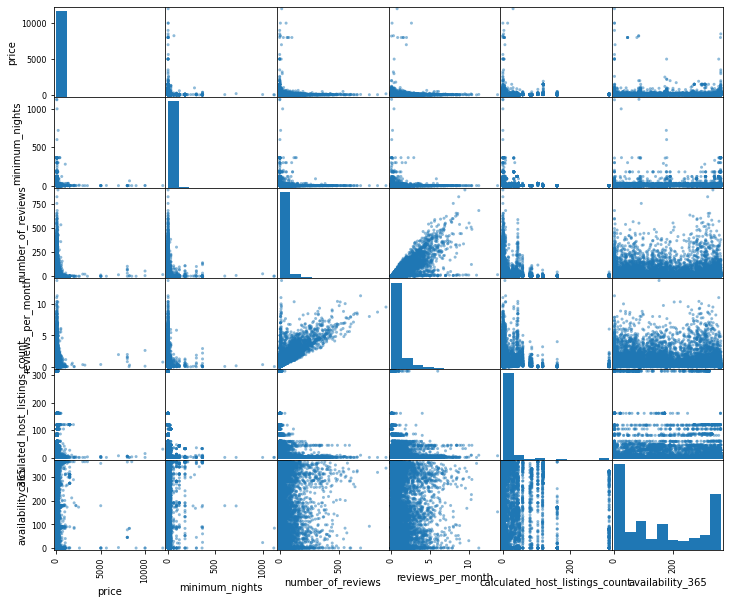

In [12]:
pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

<h5> Visualización de variables numericas en las cuales se puede apreciar una gran correlación entre last_reviews y reviews_per_month </h5>

/home/perseis/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


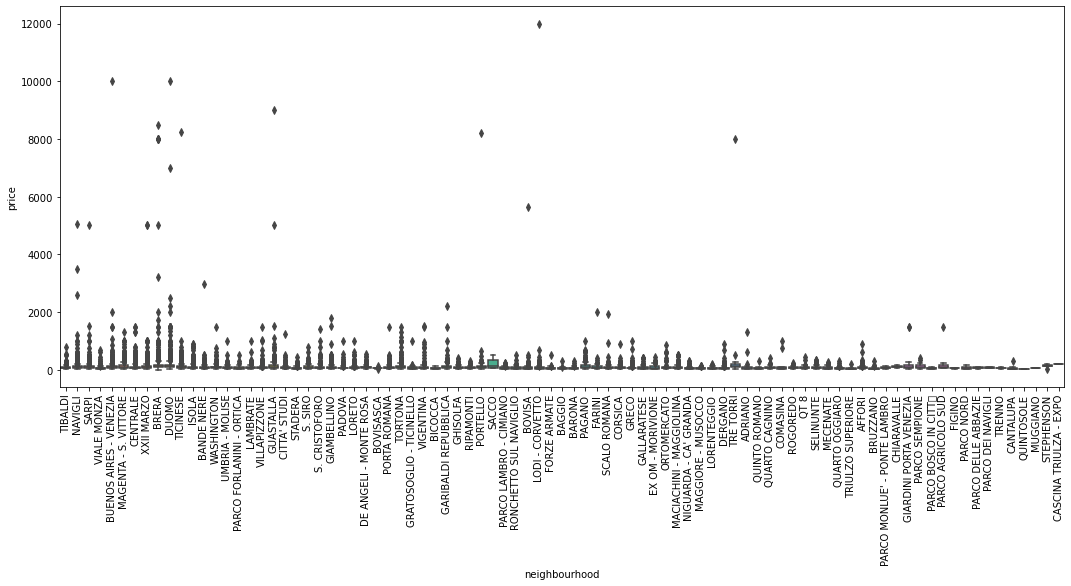

In [13]:
# Gráfico para comparar los precios de los distintos barrios
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='neighbourhood', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

<h5>Como se puede apreciar en la columna de precios, a partir de 2.500 euros aparecen lo que podrían ser outliers. Más adelante nos encargaríamos de ellos </h5>

<AxesSubplot:xlabel='price', ylabel='Count'>

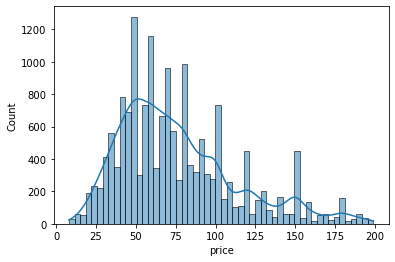

In [14]:
# Partimos de valores menores de 200 euros porque a partie de ahí estaba plagado 
# de posibles outliers que nos mostraban una gráfica de difícil lectura
sns.histplot(data=df[df["price"]< 200], x="price", kde=True)

<h5>Se aprecia que la mayoría de alojamientos cuestan alrededor de 50 euros </h5>

/home/perseis/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 133 (\x85) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/perseis/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.draw()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, 'TIBALDI'),
  Text(1, 0, 'NAVIGLI'),
  Text(2, 0, 'SARPI'),
  Text(3, 0, 'VIALE MONZA'),
  Text(4, 0, 'BUENOS AIRES - VENEZIA'),
  Text(5, 0, 'MAGENTA - S. VITTORE'),
  Text(6, 0, 'CENTRALE'),
  Text(7, 0, 'XXII MARZO'),
  Text(8, 0, 'BRERA'),
  Text(9, 0, 'DUOMO'),
  Text(10, 0, 'TICINESE'),
  Text(11, 0, 'ISOLA'),
  Text(12, 0, 'BANDE NERE'),
  Text(13, 0, 'WASHINGTON'),
  Text(14, 0, 'UMBRIA - MOLISE'),
  Text(15, 0, 'PARCO FORLANINI - ORTICA'),
  Text(16, 0, 'LAMBRATE'),
  Text(17, 0, 'VILLAPIZZONE'),
  Text(18, 0, 'GUASTALLA'),
  Text(19, 0, "CITTA' STUDI"),
  Text(20, 0, 'STAD

/home/perseis/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


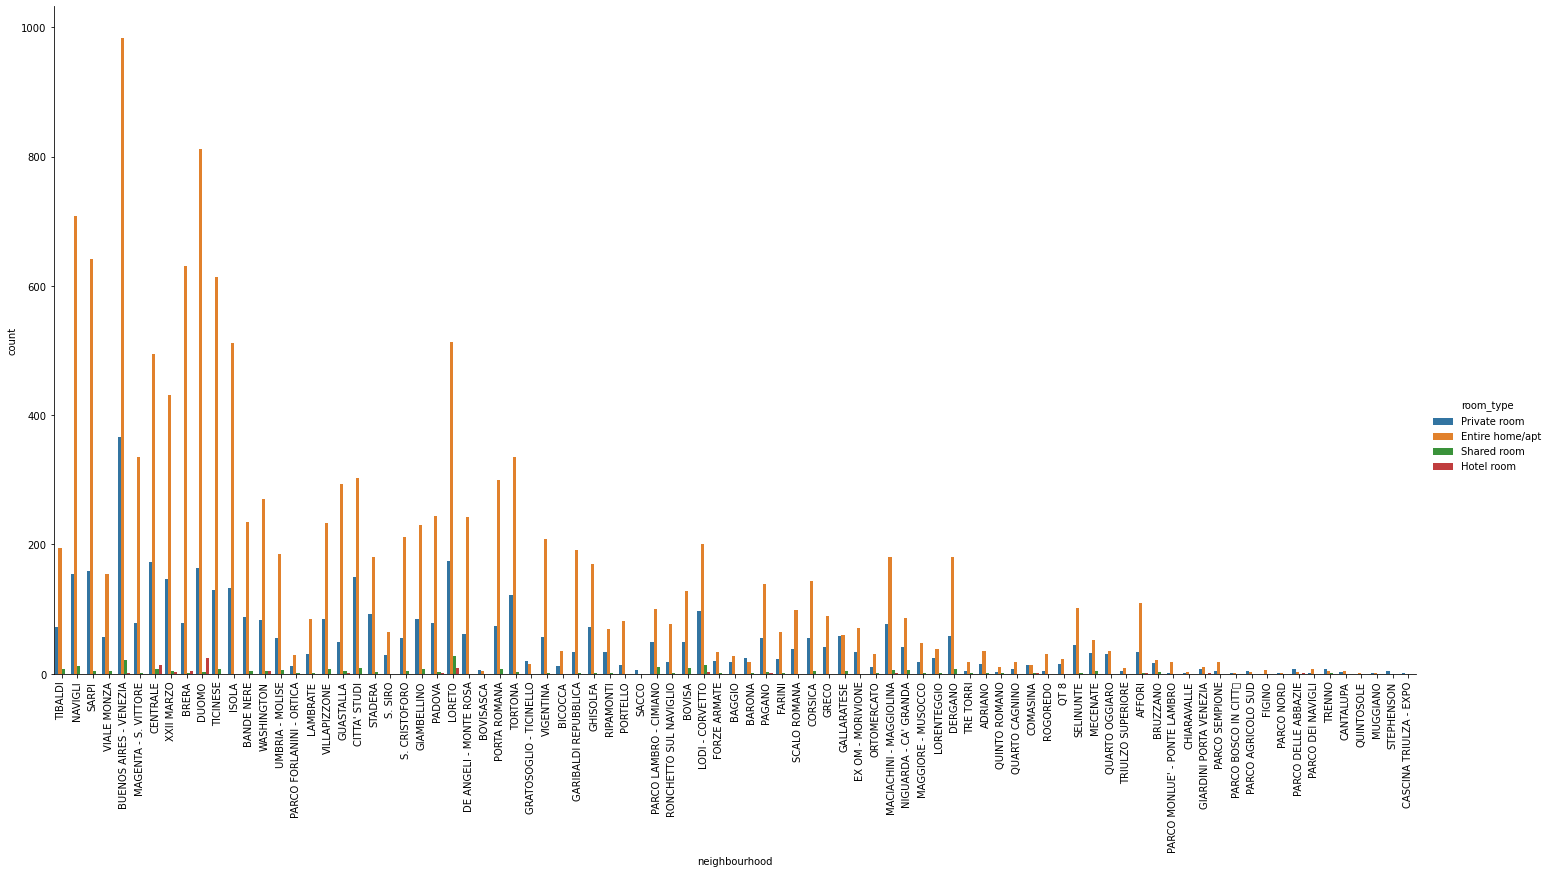

In [15]:
# Comparación de tipos de alojamiento predominantes en los barrios 
sns.catplot(x ="neighbourhood", hue ="room_type", kind ="count", data = df, aspect=2, height=10)
plt.xticks(rotation=90)

<h5>El naranja de Entire home/apt predomina en la gráfica y también se puede ver que los barrios con más alojamientos son: Buenos Aires - Venezia, Duomo y Navigli, "casualmente" en el centro de la ciudad. Los barrios con menos alojamientos se situan a las afueras de la ciudad como por ejemplo en: Cascina Triulza - Expo. El segundo tipo de alojamiento más habitual es Private room </h5>

In [16]:
# El método .corr() nos muestra una tabla de correlaciones en el dataset para las variables continuas
# La diagonal siempre es 1 porque cada variable correlaciona en 1 consigo misma, evidentemente
df.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014833,-0.041023,-0.031512,0.009837,0.005506
minimum_nights,-0.014833,1.000000,-0.035757,-0.036459,-0.006612,0.062320
number_of_reviews,-0.041023,-0.035757,1.000000,0.791941,-0.072561,0.027571
reviews_per_month,-0.031512,-0.036459,0.791941,1.000000,-0.032936,0.019183
calculated_host_listings_count,0.009837,-0.006612,-0.072561,-0.032936,1.000000,0.003735
availability_365,0.005506,0.062320,0.027571,0.019183,0.003735,1.000000


<AxesSubplot:>

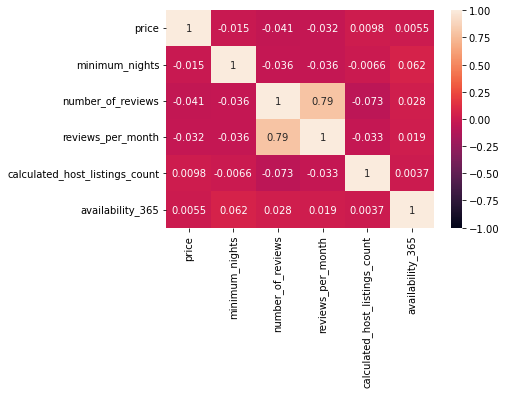

In [17]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

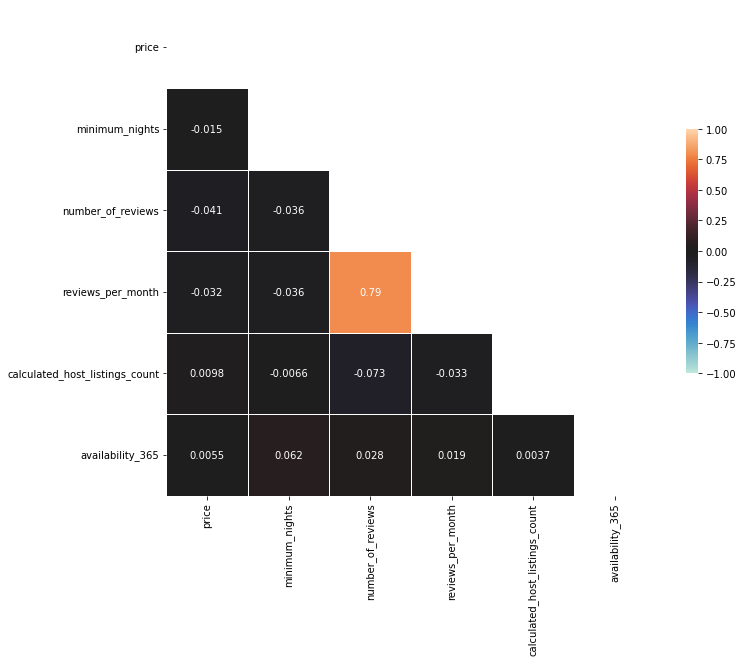

In [18]:
# Ahora igual pero más bonito

# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<h5>Comos se puede apreciar en esta última tabla y estos 2 gráficos, apenas existe correlación entre estas variables salvo entre las de _reviews y reviews_per_month</h5>

<h2>Ingeniería de características<h2/>

<h3>Imputación de valores perdidos<h3/>

In [19]:
# Comprobamos el porcentaje de valores perdidos para cada caso
ultimas_reviews_perdidas = df["last_review"].isnull().sum() / len(df["last_review"])
numero_reviews_perdidas = df["reviews_per_month"].isnull().sum() / len(df["reviews_per_month"])

print(f"Porcentaje de valores perdidos en Last_Reviews: {round(ultimas_reviews_perdidas*100, 2)}%")
print(f"Porcentaje de valores perdidos en Numero_de_reviews: {round(numero_reviews_perdidas*100, 2)}%")

Porcentaje de valores perdidos en Last_Reviews: 27.63%
Porcentaje de valores perdidos en Numero_de_reviews: 27.63%


<h5>Se observan un 27,63% de datos perdidos tanto en last_review como en reviews_per_month, valores que sustituiremos por la moda.<h5/>

In [20]:
#Obtención de la moda y sustitución de valores perdidos por la moda
last_review_mode = df["last_review"].mode()[0]
df["last_review"].fillna(last_review_mode, inplace=True) 

In [21]:
reviews_por_noche_mode = df["reviews_per_month"].mode()[0]
df["reviews_per_month"].fillna(reviews_por_noche_mode, inplace=True) 


In [22]:
#Verificación de datos perdidos
df.isnull().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<h5>Como se ve, ya no hay datos perdidos porque se han sustituido por la moda.<h5/>

<h3>Detección de outliers<h3/>

<h5>Un outlier es un valor anómalo. Un valor puede ser anómalo por diversas circunstancias: errores al anotar un dato, malfuncionamiento de un sensor, circunstancias especiales, etc.<h5/>

In [29]:
#Verificación de viviendas con precio por debajo de 2500
df[(df["price"]<2500)].value_counts().sum()

13241

<h5>La gran mayoría de valores del precio están por debjo de 2500 euros. Solo 26 viviendas tienen un precio por encima de 2500<h5/>

<AxesSubplot:xlabel='price'>

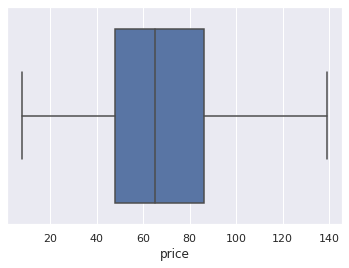

In [51]:
#Visualización de gráfica en la que vemos con claridad los outliers
sns.boxplot(x= df[(df["price"]<140)]["price"])

In [52]:
len(df[df["price"]>=140])

3320

(0.0, 700.0)

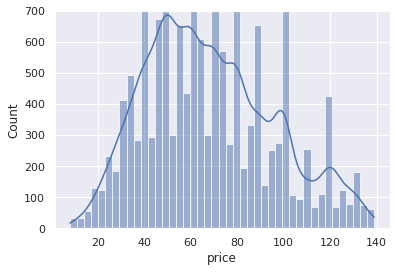

In [54]:
sns.histplot(data=df[df["price"]< 140], x="price", kde=True)
plt.ylim(0, 700)